In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv(r'd:\00 - Woxsen\MBA (Business Analytics)\Term 3 - Subjects\Machine Learning for Business\05Mar25\suv_data.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df_1 = pd.get_dummies(dataset['Gender'])
df_1

,Female,Male
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True
...,...,...
395,True,False
396,False,True
397,True,False
398,False,True


In [6]:
df_1 = df_1.astype(int)

In [7]:
df_1

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [8]:
df_2 = pd.concat([dataset,df_1],axis=1)
df_2

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [9]:
x = df_2.iloc[:,[2,3,5,6]].values
y = df_2.iloc[:,4].values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared Score: {r2:.4f}')

R-squared Score: 0.5055


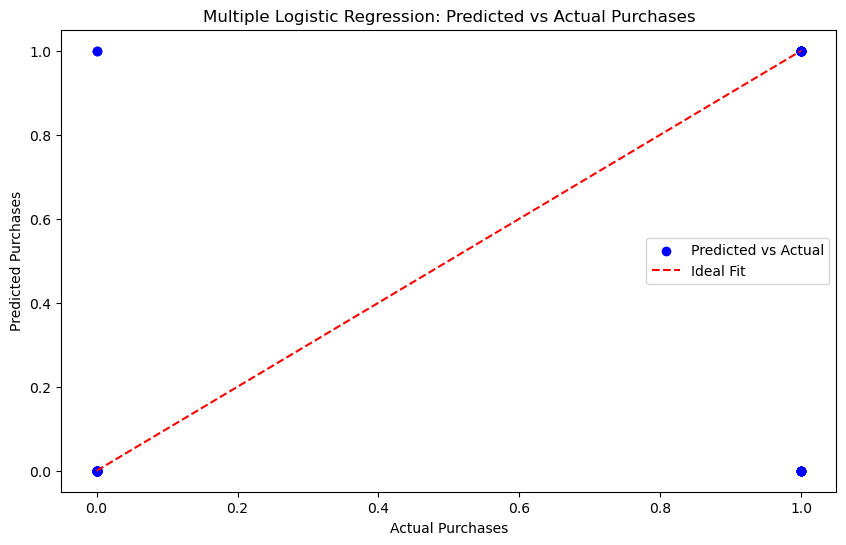

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel('Actual Purchases')
plt.ylabel('Predicted Purchases')
plt.title('Multiple Logistic Regression: Predicted vs Actual Purchases')
plt.legend()
plt.show()